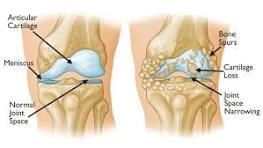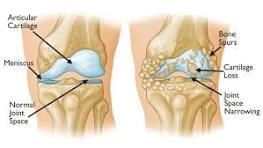

## About Dataset
### Overview
The Knee Osteoarthritis Severity X-ray & Thermal Image Dataset is a multimodal imaging dataset designed for the detection and severity grading of knee osteoarthritis (OA). It contains two types of medical images: X-ray images and thermal images of the knee joint, enabling comprehensive analysis of both structural and thermal patterns associated with OA.

### Content
This dataset contains knee X-ray and thermal images for both knee joint assessment and Kellgren-Lawrence (KL) severity grading of osteoarthritis. The severity grades are defined as follows:

Grade 0 (Healthy): No signs of osteoarthritis; normal knee joint.

Grade 1 (Doubtful): Slight joint space narrowing with possible osteophytic lipping.

Grade 2 (Minimal): Definite presence of osteophytes and possible joint space narrowing.

Grade 3 (Moderate): Multiple osteophytes, definite joint space narrowing, with mild sclerosis.

Grade 4 (Severe): Large osteophytes, significant joint narrowing, and severe sclerosis.

This multimodal dataset supports research in automated OA detection, severity classification, and comparative analysis of X-ray and thermal imaging.

Dataset Summary
Thermal Images
0 = 3253 Images 1 = 1495 Images 2 = 2175 Images 3 = 1086 Images 4 = 251 Images

X-ray Images
0 = 3253 Images 1 = 1495 Images 2 = 2175 Images 3 = 1086 Images 4 = 251 Images

Technical Details
Image Format : .png Image Type : Grayscale (X-ray), Thermal (Infrared Intensity Map) Total Images : 16,520 X-ray : 8,260 Thermal : 8,260

In [67]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense ,Conv2D,BatchNormalization,Flatten,MaxPooling2D,ELU
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
path="/kaggle/input/knee-osteoarthritis-severity-x-ray-and-thermal-image/Dataset/X-Ray  Images"

# images=[]
# labels=[]
# for i in os.listdir(path):
#     path_la=os.path.join(path,i)
#     for _ in os.listdir(path_la):
#         full=os.path.join(path_la,_)
#         img=cv2.imread(full)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img=cv2.resize(img,(224,244))
#         img=img.astype('float16')/255.
#         labels.append(i)
#         images.append(img)

In [69]:
# imge=np.array(images)
# label=np.array(labels)
# label=label.astype('int32')

In [70]:
# imge.shape

In [71]:
# images = imge.reshape(imge.shape[0], 244, 224, 1)
# # images=imge

In [72]:
# images.shape

In [73]:
# len(label)

In [74]:
# x_train , x_test ,y_train ,y_test =train_test_split(images,label,test_size=.2,shuffle=True,
#     stratify=label
# )

In [75]:
# y_train = to_categorical(y_train, num_classes=5)
# y_test = to_categorical(y_test, num_classes=5)

In [76]:
datagen = ImageDataGenerator(
    rescale=1./255,           
    validation_split=0.2      )

In [77]:
train_gen = datagen.flow_from_directory(
    path,
    target_size=(244, 224),
    batch_size=32,
    color_mode='grayscale',    
    class_mode='sparse',       
    subset='training'
)

Found 6609 images belonging to 5 classes.


In [78]:
val_gen = datagen.flow_from_directory(
    path,
    target_size=(244, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='sparse',
    subset='validation'
)

Found 1651 images belonging to 5 classes.


In [79]:
# class mymodel(Model):
#     def __init__(self):
#         super().__init__()
#         self.c1=Conv2D(32,(2,2),padding="same",activation='relu')
#         # self.b1=BatchNormalization()
#         self.p1=MaxPooling2D((2,2))
        
#         self.c2=Conv2D(128,(2,2),padding="same",activation='relu')
#         self.b2=BatchNormalization()
#         self.p2=MaxPooling2D((2,2))
        
#         self.c3=Conv2D(32,(2,2),padding="same",activation='relu')
#         # self.b3=BatchNormalization()
#         self.p3=MaxPooling2D((2,2))

#         self.f=Flatten()

#         self.d1=Dense(64,activation='relu')
#         self.d2=Dense(32,activation='relu')
#         self.out=Dense(5,activation='softmax')



#     def call(self ,inputs):
#         x=self.c1(inputs)
#         # x=self.b1(x)
#         x=self.p1(x)
       
#         x=self.c2(x)
#         # x=self.b2(x)
#         x=self.p2(x)
        
#         x=self.c3(x)
#         # x=self.b3(x)
#         x=self.p3(x)

#         x=self.f(x)

#         x=self.d1(x)
#         x=self.d2(x)

#         return self.out(x)

In [80]:
# class mymodel(Model):
#     def __init__(self):
#         super().__init__()
        
#         self.c1 = Conv2D(32, (3,3), padding="same") 
#         self.l1 = LeakyReLU(alpha=0.1) 
#         self.p1 = MaxPooling2D((2,2))
        
        
#         self.c2 = Conv2D(64, (3,3), padding="same")
#         self.b2 = BatchNormalization()
#         self.l2 = LeakyReLU(alpha=0.1)
#         self.p2 = MaxPooling2D((2,2))
        
        
#         self.c3 = Conv2D(128, (3,3), padding="same")
#         self.l3 = LeakyReLU(alpha=0.1)
#         self.p3 = MaxPooling2D((2,2))

#         self.f = Flatten()

        
#         self.d1 = Dense(128)
#         self.ld1 = LeakyReLU(alpha=0.1)
        
#         self.d2 = Dense(64)
#         self.ld2 = LeakyReLU(alpha=0.1)
        
#         self.out = Dense(5, activation='softmax')

#     def call(self, inputs):
#         x = self.c1(inputs)
#         x = self.l1(x)
#         x = self.p1(x)
       
#         x = self.c2(x)
#         x = self.b2(x)
#         x = self.l2(x)
#         x = self.p2(x)
        
#         x = self.c3(x)
#         x = self.l3(x)
#         x = self.p3(x)

#         x = self.f(x)

#         x = self.d1(x)
#         x = self.ld1(x)
        
#         x = self.d2(x)
#         x = self.ld2(x)

#         return self.out(x)



In [81]:
class mymodel(Model):
    def __init__(self):
        super().__init__()
        
        self.c1 = Conv2D(32, (3,3), padding="same")
        self.a1 = ELU()
        self.p1 = MaxPooling2D((2,2))
        
        self.c2 = Conv2D(64, (3,3), padding="same")
        self.b2 = BatchNormalization()
        self.a2 = ELU()
        self.p2 = MaxPooling2D((2,2))
        
        self.c3 = Conv2D(128, (3,3), padding="same")
        self.a3 = ELU()
        self.p3 = MaxPooling2D((2,2))

        self.f = Flatten()

        self.d1 = Dense(128)
        self.ad1 = ELU()
        
        self.d2 = Dense(64)
        self.ad2 = ELU()
        
        self.out = Dense(5, activation='softmax')

    def call(self, inputs):
        x = self.c1(inputs)
        x = self.a1(x)
        x = self.p1(x)
       
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)
        
        x = self.c3(x)
        x = self.a3(x)
        x = self.p3(x)

        x = self.f(x)

        x = self.d1(x)
        x = self.ad1(x)
        
        x = self.d2(x)
        x = self.ad2(x)

        return self.out(x)

In [82]:

model = mymodel()
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


model.build(input_shape=(None, 244, 224, 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'mymodel_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [83]:
early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=10,             
    restore_best_weights=True 
)

In [84]:
checkpoint = ModelCheckpoint(
    filepath='best_knee_model.keras.h5', 
    monitor='val_accuracy',           
    save_best_only=True,              
    mode='max'                        
)

In [85]:
my_callbacks = [early_stop, checkpoint]

In [86]:
# model.compile(
#     optimizer="Adam", 
#     loss="categorical_crossentropy", 
#     metrics=["accuracy"]
# )

In [87]:
# model.fit(x_train,y_train,batch_size=50,
#     epochs=100,validation_data=(x_test,y_test),
#     callbacks=my_callbacks)

In [88]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=my_callbacks
)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3103 - loss: 3.0349

207/207 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.3105 - loss: 3.0295 - val_accuracy: 0.3937 - val_loss: 1.3945
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.3867 - loss: 1.4096 - val_accuracy: 0.3937 - val_loss: 1.4807
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3997 - loss: 1.3998

207/207 ━━━━━━━━━━━━━━━━━━━━ 28s 134ms/step - accuracy: 0.3997 - loss: 1.3997 - val_accuracy: 0.4488 - val_loss: 1.3383
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.4323 - loss: 1.3227

207/207 ━━━━━━━━━━━━━━━━━━━━ 29s 137ms/step - accuracy: 0.4323 - loss: 1.3226 - val_accuracy: 0.5064 - val_loss: 1.2331
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - accuracy: 0.4760 - loss: 1.2106 - val_accuracy: 0.4737 - val_loss: 1.1909
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4956 - loss: 1.1414

207/207 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.4957 - loss: 1.1413 - val_accuracy: 0.5360 - val_loss: 1.1005
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.5284 - loss: 1.0991 - val_accuracy: 0.5336 - val_loss: 1.0941
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 24s 114ms/step - accuracy: 0.5563 - loss: 1.0251 - val_accuracy: 0.5276 - val_loss: 1.1223
Epoch 9/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.5804 - loss: 0.9741 - val_accuracy: 0.5257 - val_loss: 1.1023
Epoch 10/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5897 - loss: 0.9518

207/207 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.5897 - loss: 0.9518 - val_accuracy: 0.5651 - val_loss: 1.0655
Epoch 11/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.6371 - loss: 0.8391 - val_accuracy: 0.5215 - val_loss: 1.0763
Epoch 12/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.6716 - loss: 0.7848 - val_accuracy: 0.5306 - val_loss: 1.1358
Epoch 13/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.7384 - loss: 0.6492 - val_accuracy: 0.5457 - val_loss: 1.2238
Epoch 14/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.7910 - loss: 0.5188 - val_accuracy: 0.4300 - val_loss: 1.4797
Epoch 15/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.8527 - loss: 0.3860 - val_accuracy: 0.5439 - val_loss: 1.6503
Epoch 16/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.9012 - loss: 0.2625 - val_accuracy: 0.5154 - val_loss: 1.9725
Epoch 17/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.9409 - loss: 0.1657 - 